In [1]:
import pandas as pd
import numpy as np


In [2]:
%matplotlib inline

# 6-1

In [3]:
q6 = pd.read_csv('./data/BostonHousing.csv')

In [4]:
q6.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2,1


In [5]:
q6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  LSTAT      506 non-null    float64
 12  MEDV       506 non-null    float64
 13  CAT. MEDV  506 non-null    int64  
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [6]:
y = q6['MEDV']
X = q6.drop(columns = ['CAT. MEDV', 'MEDV'])

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
dtypes: float64(9), int64(3)
memory usage: 47.6 KB


In [8]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [9]:
X.shape

(506, 12)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.4, random_state = 42)

In [11]:
# split 한 후 fit_transform 해야함 
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)



In [12]:
# Train a classifier for different values of k
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

results = []
for k in range(1, 5):
    knn = KNeighborsRegressor(n_neighbors=k).fit(X_train_ss, y_train)
    results.append({
        'k': k,
        'mean_squared_error': mean_squared_error(y_test, knn.predict(X_test_ss))
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

   k  mean_squared_error
0  1           18.786305
1  2           14.894470
2  3           17.138035
3  4           18.474132


# 6-2

In [13]:
best_k = results.loc[results['mean_squared_error'] == results['mean_squared_error'].min(), 'k'].values[0]

In [14]:
knn_2 = KNeighborsRegressor(n_neighbors=best_k).fit(X_train, y_train)

In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [16]:
# 문제에서 제공한 신규 파라미터 정의
add_X = pd.DataFrame([[0.2, 0, 7, 0, 0.538, 6, 62, 4.7, 4, 307, 21, 10]]
                     , columns = X.columns
                    )

In [17]:
# 정규화진행
add_X_ss = ss.transform(add_X)

In [18]:
# MED 값 예측
result = knn_2.predict(add_X_ss)

In [19]:
print(result)

[43.6]


# 6-4

In [20]:
X.shape

(506, 12)

# 7-1

In [21]:
q7 = pd.read_csv('./data/CourseTopics.csv')

In [22]:
q7.head()

,Intro,DataMining,Survey,Cat Data,Regression,Forecast,DOE,SW
0,1,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,1,0,1,1,0,0,1
3,1,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0


In [23]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [24]:
# create frequent itemsets
itemsets = apriori(q7, min_support=0.01, use_colnames=True)

# and convert into rules
rules = association_rules(itemsets, metric='confidence', min_threshold=0.1)
rules.sort_values(by=['lift'], ascending=False).head(6)

print(rules.sort_values(by=['lift', 'confidence', 'support'], ascending=False)
      .drop(columns=['antecedent support', 'consequent support', 'conviction', 'leverage'])
      .head(4))

           antecedents        consequents   support  confidence      lift
318       (Intro, DOE)   (Regression, SW)  0.019178    0.411765  7.514706
319   (Regression, SW)       (Intro, DOE)  0.019178    0.350000  7.514706
321  (Regression, DOE)        (Intro, SW)  0.019178    0.636364  6.636364
316        (Intro, SW)  (Regression, DOE)  0.019178    0.200000  6.636364


In [25]:
q7.sum()/len(q7)*100

Intro         39.452055
DataMining    17.808219
Survey        18.630137
Cat Data      20.821918
Regression    20.821918
Forecast      13.972603
DOE           17.260274
SW            22.191781
dtype: float64

# 8-1 

In [26]:
q8 = pd.read_csv('./data/eBayAuctions.csv')

In [27]:
q8.head()

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0


In [28]:
q8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1972 entries, 0 to 1971
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Category      1972 non-null   object 
 1   currency      1972 non-null   object 
 2   sellerRating  1972 non-null   int64  
 3   Duration      1972 non-null   int64  
 4   endDay        1972 non-null   object 
 5   ClosePrice    1972 non-null   float64
 6   OpenPrice     1972 non-null   float64
 7   Competitive?  1972 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 123.4+ KB


In [29]:
q8_dummy = pd.get_dummies(q8, columns=['Category', 'currency', 'endDay'], drop_first=True)

In [30]:
len(pd.get_dummies(q8[['Category', 'currency', 'endDay']], drop_first=True).columns)

25

# 8-2

In [31]:
X = q8_dummy
y = q8['Competitive?']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=22)

In [33]:
# LogisticRegression()으로 학습을 했을 때 아래와 같은 경고문이 뜹니다. 
# 사이킷런 0.22 버전에서는 default solver가 'liblinear’ 에서 ‘lbfgs’ 로 변경되면서 이런 warnng도 내어주는 군요. 
# clf = LogisticRegression(solver='liblinear')


from sklearn.linear_model import LogisticRegression
from dmba import classificationSummary

lr = LogisticRegression(solver='liblinear')
model = lr.fit(X_train, y_train)

no display found. Using non-interactive Agg backend


In [34]:
y_pred = model.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

classificationSummary(y_test, y_pred)

Confusion Matrix (Accuracy 0.9987)

       Prediction
Actual   0   1
     0 374   1
     1   0 414


In [36]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

1.0

# 8-3

In [37]:
X_train_drop = X_train.drop(columns='ClosePrice')
X_test_drop = X_test.drop(columns='ClosePrice')

In [38]:
# LogisticRegression()으로 학습을 했을 때 아래와 같은 경고문이 뜹니다. 
# 사이킷런 0.22 버전에서는 default solver가 'liblinear’ 에서 ‘lbfgs’ 로 변경되면서 이런 warnng도 내어주는 군요. 
# clf = LogisticRegression(solver='liblinear')


from sklearn.linear_model import LogisticRegression
from dmba import classificationSummary

lr = LogisticRegression(solver='liblinear')
model = lr.fit(X_train_drop, y_train)

In [39]:
y_pred_drop = model.predict(X_test_drop)

In [40]:
from sklearn.metrics import confusion_matrix

classificationSummary(y_test, y_pred_drop)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 375   0
     1   0 414


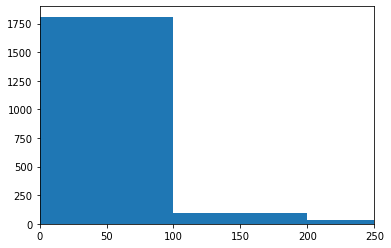

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.hist(q8_dummy['ClosePrice'].values)
plt.xlim([0, 250])      # X축의 범위: [xmin, xmax]
plt.show()

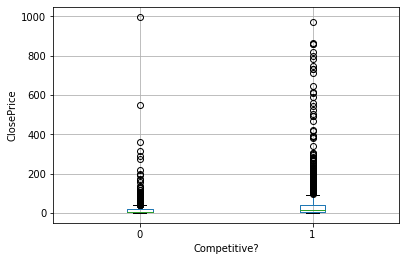

In [42]:
%matplotlib inline
ax = q8_dummy.boxplot(column='ClosePrice', by='Competitive?')
ax.set_ylabel('ClosePrice')
plt.suptitle('')  # Suppress the titles
plt.title('')

plt.show()

# 8-4

In [43]:
from sklearn.linear_model import LogisticRegressionCV
from dmba import classificationSummary

# penalty='l1'사용을 위해 solver='liblinear' 옵션 추가
# 기본 solver lbfgs로는 l2패널티만 사용 가능 
lr = LogisticRegressionCV(cv = 5, random_state = 0,Cs = 20, max_iter = 500, solver='liblinear', penalty='l1')
model = lr.fit(X_train_drop, y_train)

In [44]:
y_pred_drop_cv = model.predict(X_test_drop)

In [45]:
from sklearn.metrics import confusion_matrix

classificationSummary(y_test, y_pred_drop_cv)

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual   0   1
     0 375   0
     1   0 414
